# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [46]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


In [47]:
path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 2\\DATASOURCE\\"
train_file_name = "TRAIN.xlsx"
test_file_name = "TEST.xlsx"
model_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 2\\MODELS\\"
train = pd.read_excel(path+train_file_name)
test = pd.read_excel(path+test_file_name)

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 2\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY TREND\\MODEL 2\\FIGURES\\"


In [48]:
test.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density', 'Ref. Name'],
      dtype='object')

In [49]:
train.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density'],
      dtype='object')

In [50]:
X_train = train.drop(["Density",'Sr.No'],axis = 1)
y_train = train.Density
X_test = test.drop(["Density",'Sr.No','Ref. Name'],axis = 1)
y_test = test.Density

                              #### Load Models For testing purpose  ####

In [51]:
#All File Name variable
scaler_file = 'scaler.sav'
svr_file    = 'svr_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'


In [52]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))


                              #### First Scale All Inputs with scaler model  ####

In [53]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. SVR MODEL

In [54]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [55]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9825050275925347 0.9834887603001364


In [56]:
result_svr_train = pd.DataFrame()
result_svr_train["Density (train)"] = y_train
result_svr_train["Predicted Density (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Density (train)"] - result_svr_train["Predicted Density (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Density (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Density (test)"] = y_test
result_svr_test["Predicted Density (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Density (test)"] - result_svr_test["Predicted Density (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Density (test)"]




In [57]:
result_svr_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,213.000000,213.000000,213.000000,213.000000
mean,572.159858,575.313327,17.176361,6.294824
std,209.409223,204.828721,21.697336,20.695804
min,28.600000,37.499800,0.094740,0.011070
25%,440.400000,448.712994,3.288004,0.570348
50%,618.812000,633.549070,10.195650,1.939533
75%,730.300599,735.769781,23.789105,4.493711
max,877.071303,876.974208,173.528521,205.010021


In [58]:
result_svr_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,29.000000,29.000000,29.000000,29.000000
mean,654.529131,649.895048,11.603455,1.821908
std,113.161186,102.387163,8.484407,1.588297
min,462.100000,491.749956,0.290993,0.046537
25%,596.103892,589.123258,4.915091,0.805545
50%,635.500000,642.455578,8.857492,1.485897
75%,681.044768,685.602461,18.463320,2.291718
max,826.794265,813.460776,29.649956,6.416351


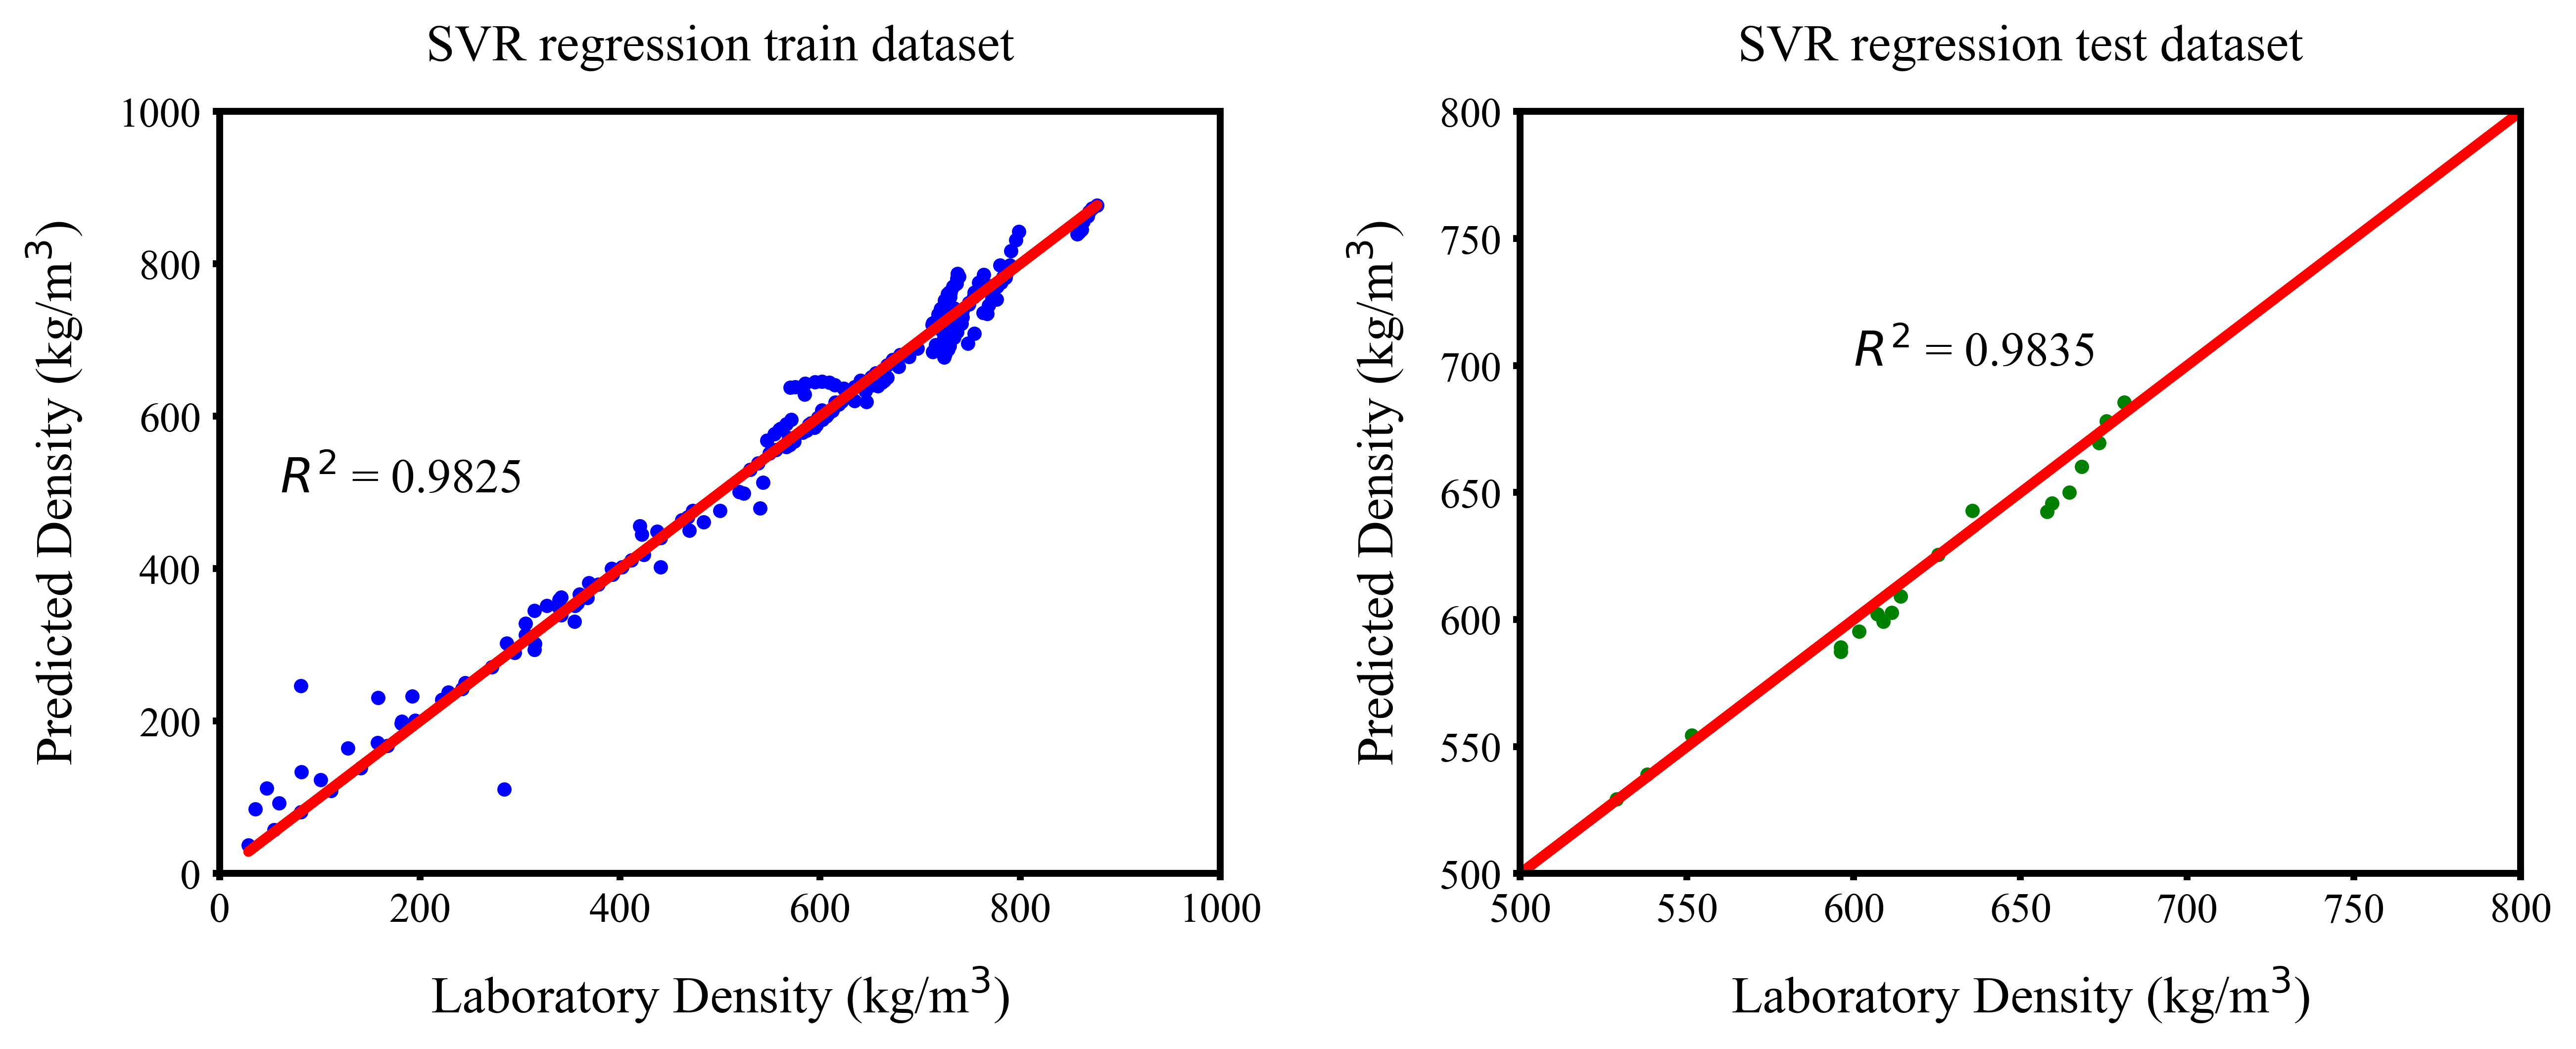

In [70]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"

fig_svr = plt.figure(figsize=(12,4) , dpi = 500)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
#fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [71]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

763.5915772772056 17.176361312786184 204.14309696219274 11.603455247250533


## 2. KNN Model

In [72]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [73]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.98026082570518 0.8096158638879885


In [74]:
result_knn_train = pd.DataFrame()
result_knn_train["Density (train)"] = y_train
result_knn_train["Predicted Density (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Density (train)"] - result_knn_train["Predicted Density (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Density (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Density (test)"] = y_test
result_knn_test["Predicted Density (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Density (test)"] - result_knn_test["Predicted Density (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Density (test)"]




In [75]:
result_knn_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,213.000000,213.000000,213.000000,213.000000
mean,572.159858,571.351286,14.412258,6.581142
std,209.409223,206.288323,25.630328,19.987048
min,28.600000,68.750000,0.075000,0.015177
25%,440.400000,423.600000,2.296500,0.332876
50%,618.812000,618.613250,5.850000,0.902066
75%,730.300599,731.503011,14.450000,4.081633
max,877.071303,871.339121,210.375000,150.000000


In [76]:
result_knn_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,29.000000,29.000000,29.000000,29.000000
mean,654.529131,655.831472,35.813045,5.929603
std,113.161186,151.742791,33.310282,6.344476
min,462.100000,394.600000,0.517974,0.077500
25%,596.103892,604.747750,8.437249,1.279528
50%,635.500000,667.840250,40.931908,4.959443
75%,681.044768,682.898000,48.000000,7.931253
max,826.794265,867.798659,134.200000,25.378215


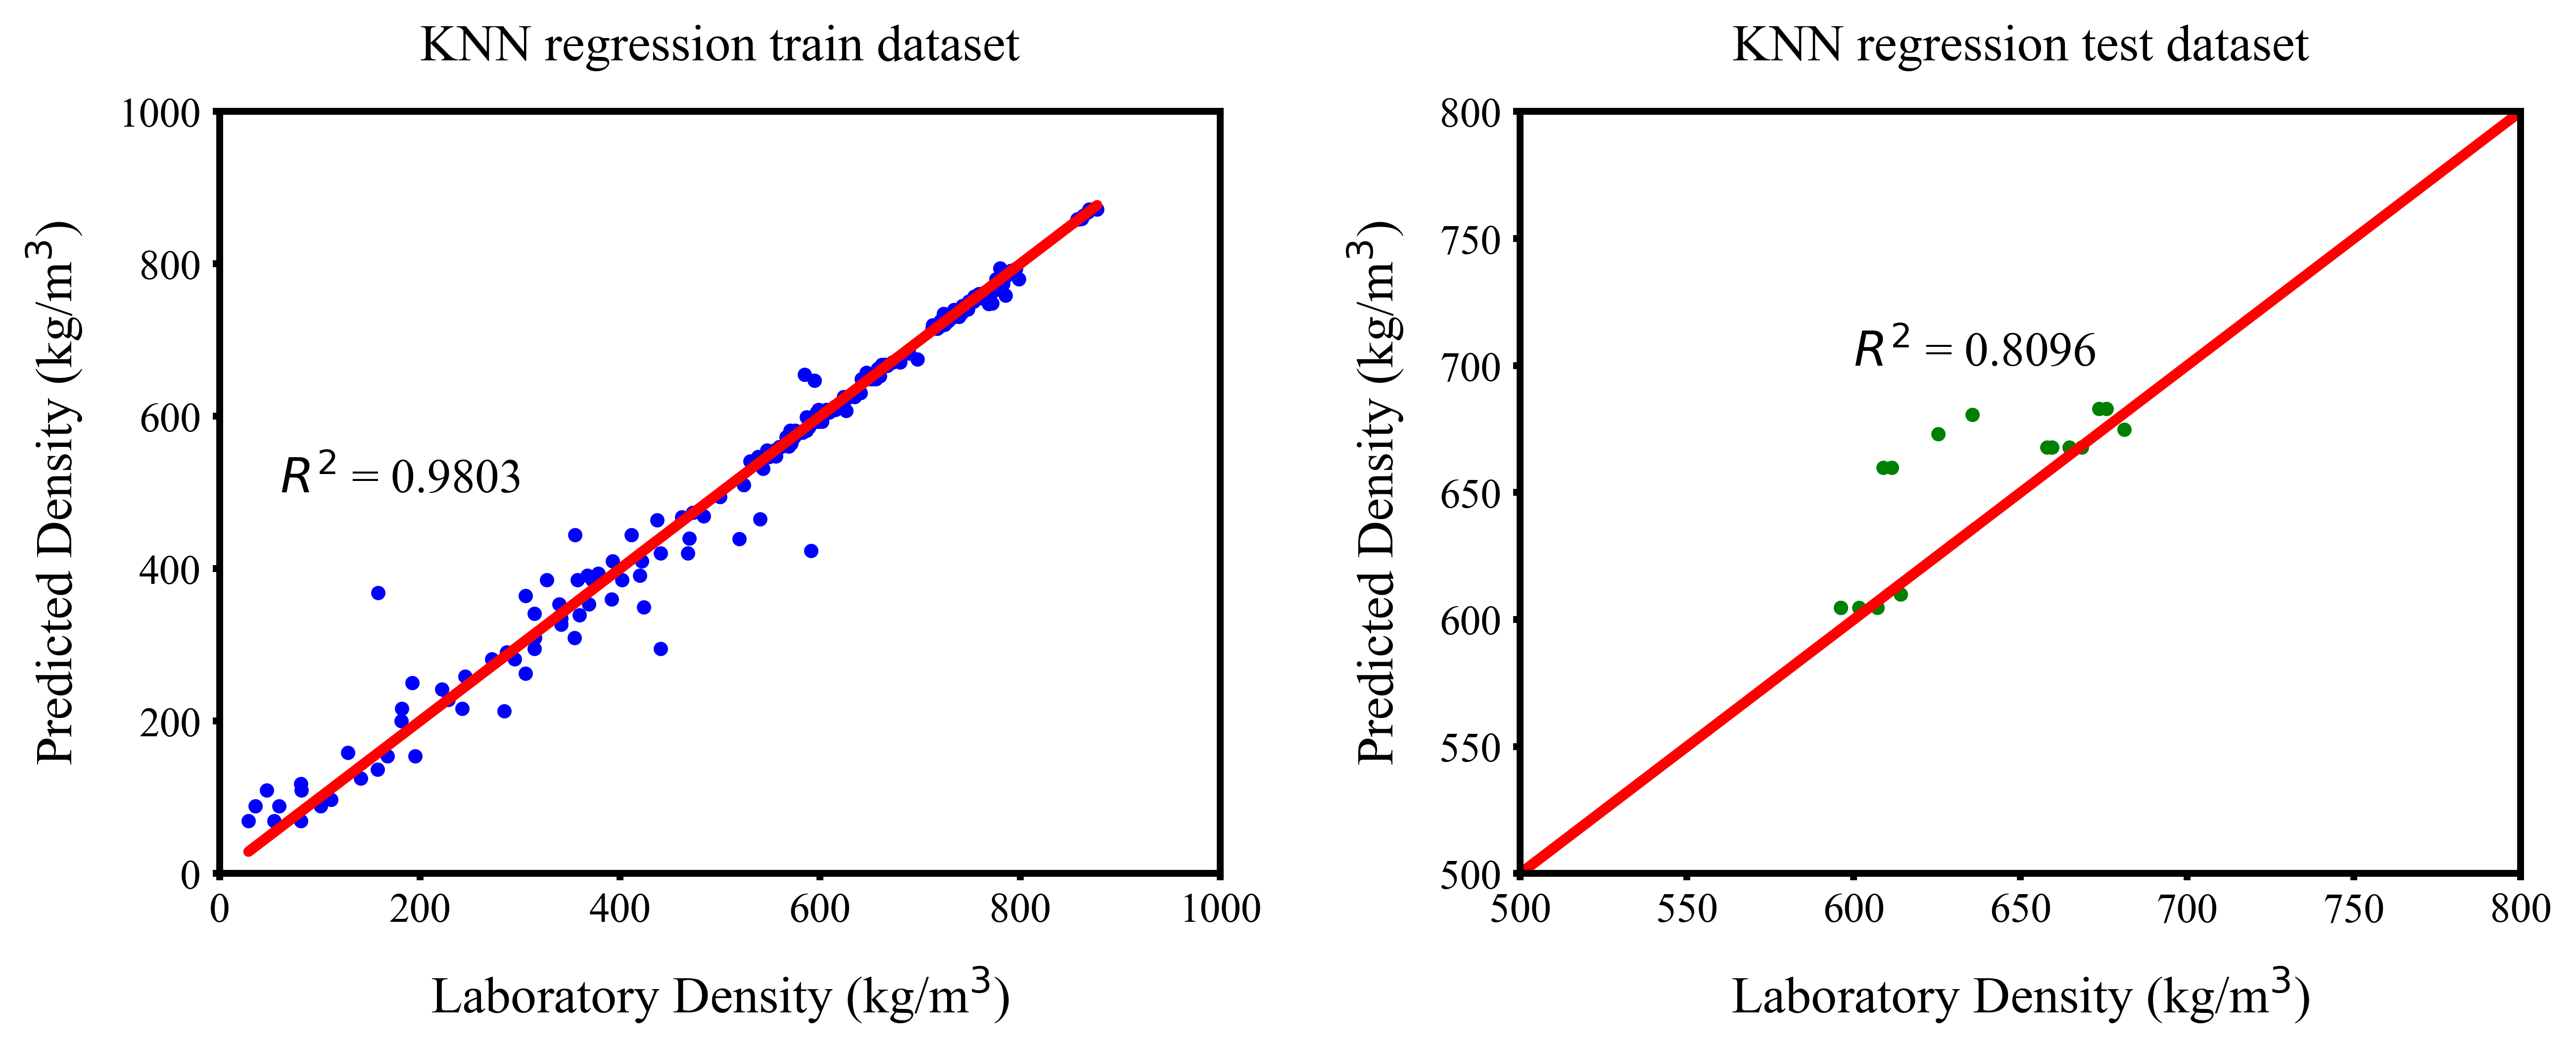

In [77]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 600,700 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

#fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [78]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

861.5427840000262 14.41225829403119 2353.8878887875912 35.81304514602489


## 3. XGB Model

In [79]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [80]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9995819586795441 0.9744712975247131


In [81]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Density (train)"] = y_train
result_xgb_train["Predicted Density (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Density (train)"] - result_xgb_train["Predicted Density (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Density (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Density (test)"] = y_test
result_xgb_test["Predicted Density (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Density (test)"] - result_xgb_test["Predicted Density (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Density (test)"]




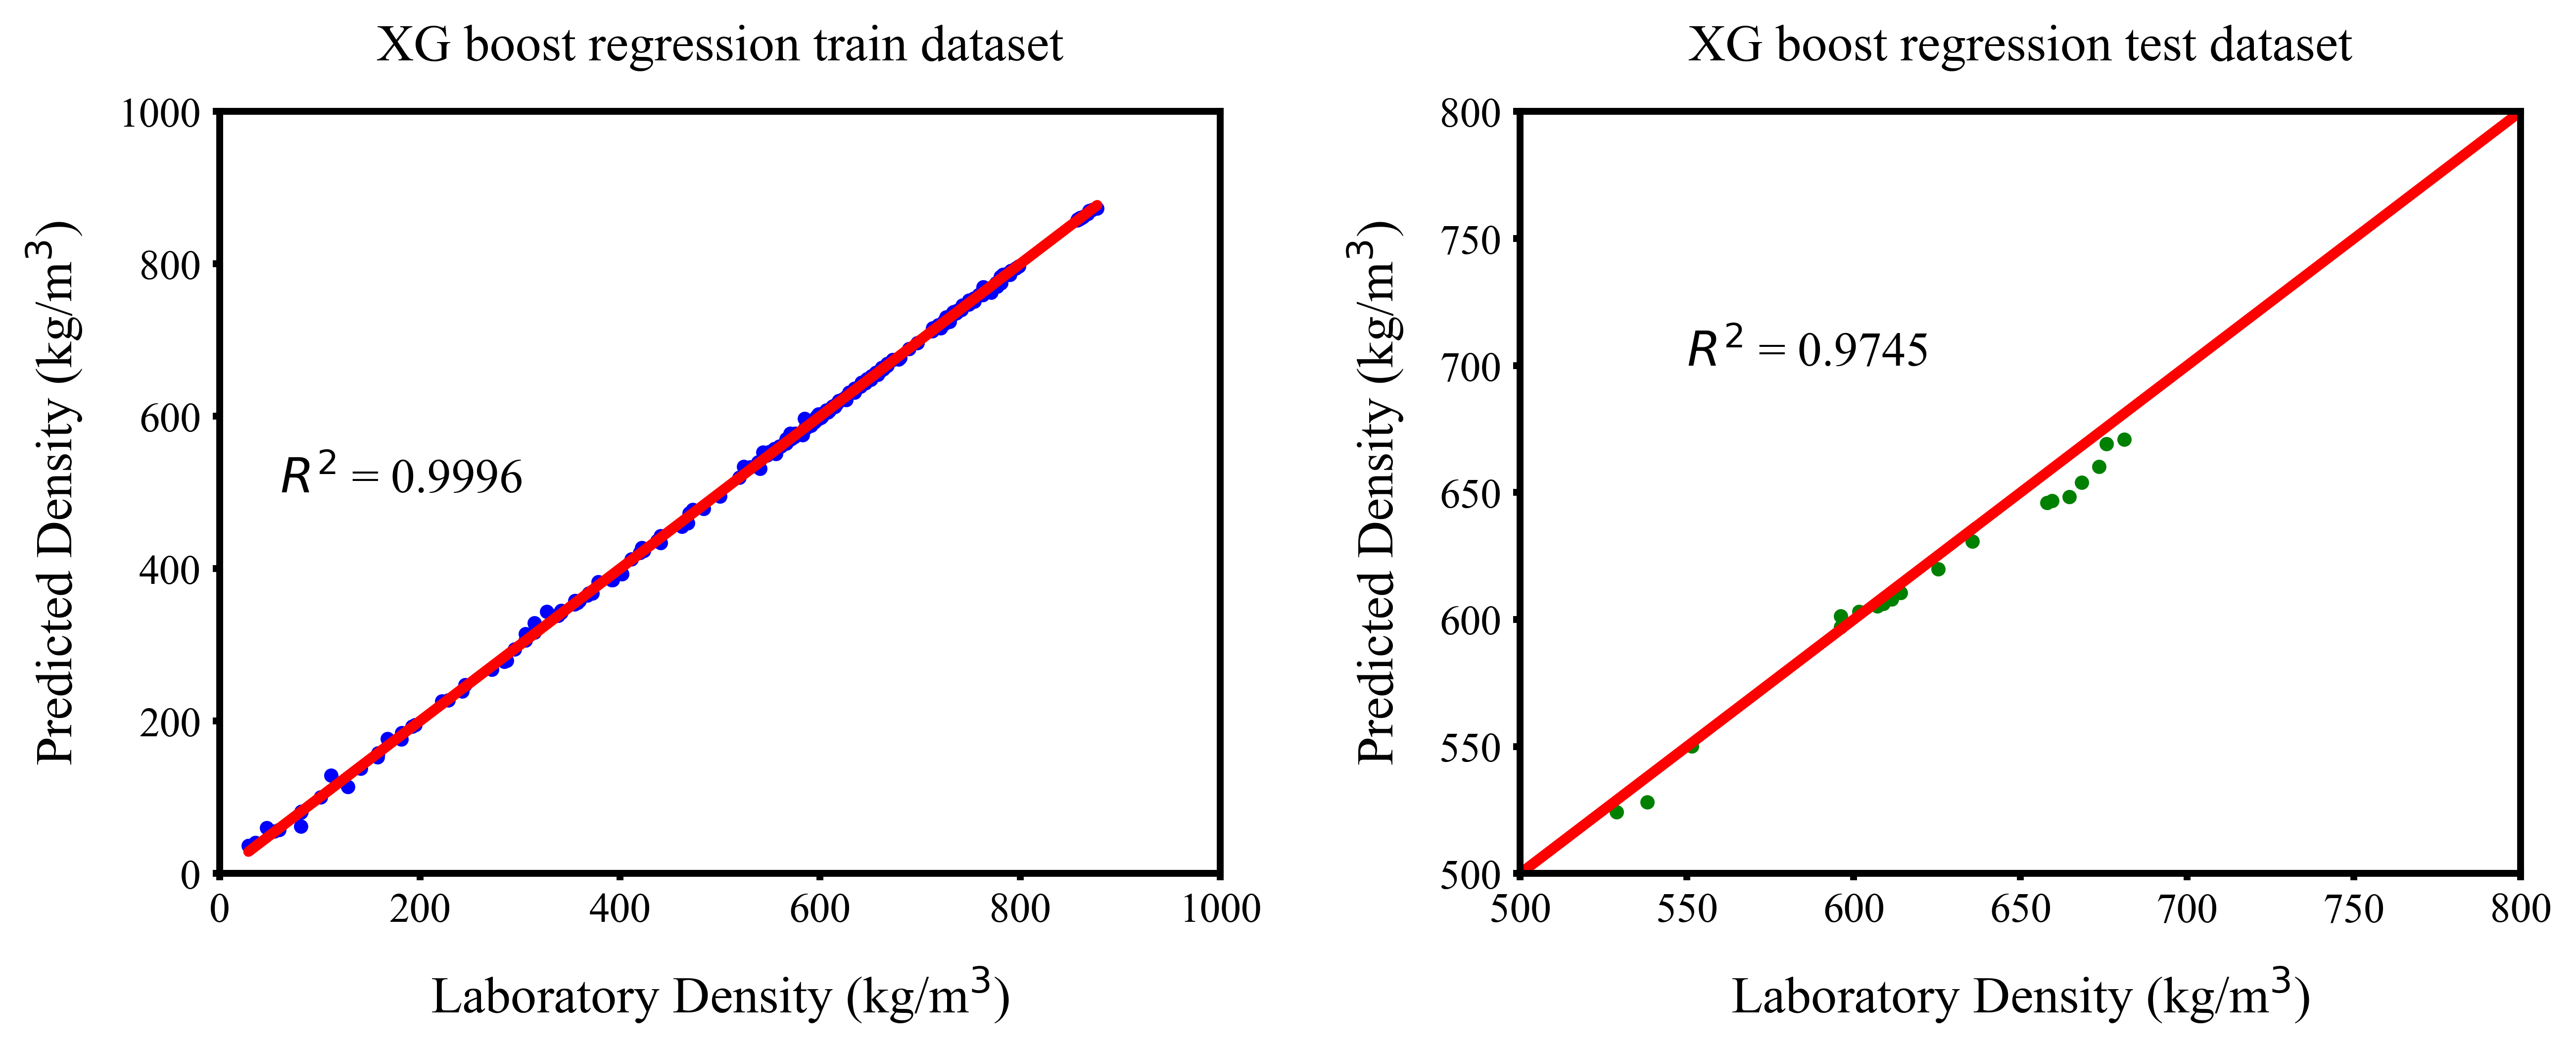

In [82]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 60,500 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,1000))
plt.ylim((0,1000))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Density (kg/m$^{3}$)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text(  550,700, "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((500,800))
plt.ylim((500,800))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

#fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [83]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

18.245975118983317 2.833145368251293 315.63398505894935 12.733485490127173


In [84]:
result_xgb_train.describe()

,Density (train),Predicted Density (train),Residues,Absolute Error (%)
count,213.000000,213.000000,213.000000,213.000000
mean,572.159858,572.156616,2.833145,1.135422
std,209.409223,209.100128,3.204289,3.511516
min,28.600000,36.422077,0.000385,0.000053
25%,440.400000,436.444366,0.792374,0.122653
50%,618.812000,620.093689,1.700437,0.308726
75%,730.300599,730.949524,3.648231,0.726275
max,877.071303,872.957214,19.047520,27.983680


In [85]:
result_xgb_test.describe()

,Density (test),Predicted Density (test),Residues,Absolute Error (%)
count,29.000000,29.000000,29.000000,29.000000
mean,654.529131,649.332092,12.733485,2.129575
std,113.161186,127.149124,12.608497,2.690467
min,462.100000,422.221741,1.026540,0.172208
25%,596.103892,601.256104,4.635571,0.729713
50%,635.500000,630.862671,12.030509,1.644327
75%,681.044768,670.892700,14.382089,1.984547
max,826.794265,840.389465,48.690485,10.259268


In [86]:
model_comp_test = pd.DataFrame({
    'Model Name' : [ 'SVM'  , 'KNN' ,"XGB"],
    'R Square' : [svr_regression_testR2 ,knn_regression_testR2,xgb_regression_testR2],
    'MSE' : [svr_MSE_test,knn_MSE_test,xgb_MSE_test],
    'MAE' : [svr_MAE_test ,knn_MAE_test,xgb_MAE_test],
    '%AAD' : [result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
             
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [87]:
model_comp_test

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.983489,204.143097,11.603455,1.821908
1,KNN,0.809616,2353.887889,35.813045,5.929603
2,XGB,0.974471,315.633985,12.733485,2.129575


In [88]:
model_comp_train = pd.DataFrame({
    'Model Name' : ['SVM' ,'KNN',"XGB"],
    'R Square' : [svr_regression_trainR2 ,knn_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [svr_MSE_train , knn_MSE_train,xgb_MSE_train],
    'MAE' : [svr_MAE_train ,knn_MAE_train,xgb_MSE_train],
    '%AAD' : [result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [89]:
model_comp_train

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.982505,763.591577,17.176361,6.294824
1,KNN,0.980261,861.542784,14.412258,6.581142
2,XGB,0.999582,18.245975,18.245975,1.135422


In [90]:
## Final File For prediction values and graph visualization for each crude for each model

## 1. Visulization of Result with SVR

In [91]:
svr_test_result = test[["P","Density","Ref. Name","Temp"]]
svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]

<ipython-input-91-108dfe06e943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svr_test_result["Density Predicted"] = result_svr_test["Predicted Density (test)"]


In [92]:
svr_test_result.head()

,P,Density,Ref. Name,Temp,Density Predicted
0,344.8,635.5,CRUDE 1,385.6,642.773199
1,275.9,625.3,CRUDE 1,385.6,625.590993
2,200.0,611.3,CRUDE 1,385.6,602.686284
3,189.4,608.9,CRUDE 1,385.6,599.159681
4,413.8,551.4,CRUDE 2,353.3,554.409652


In [93]:
Ref_name_list = svr_test_result["Ref. Name"].unique()

In [94]:
Ref_name_list

array(['CRUDE 1', 'CRUDE 2', 'CRUDE 3', 'CRUDE 4', 'CRUDE 5', 'CRUDE 6'],
      dtype=object)

<ipython-input-95-51b67f09d066>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-95-51b67f09d066>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


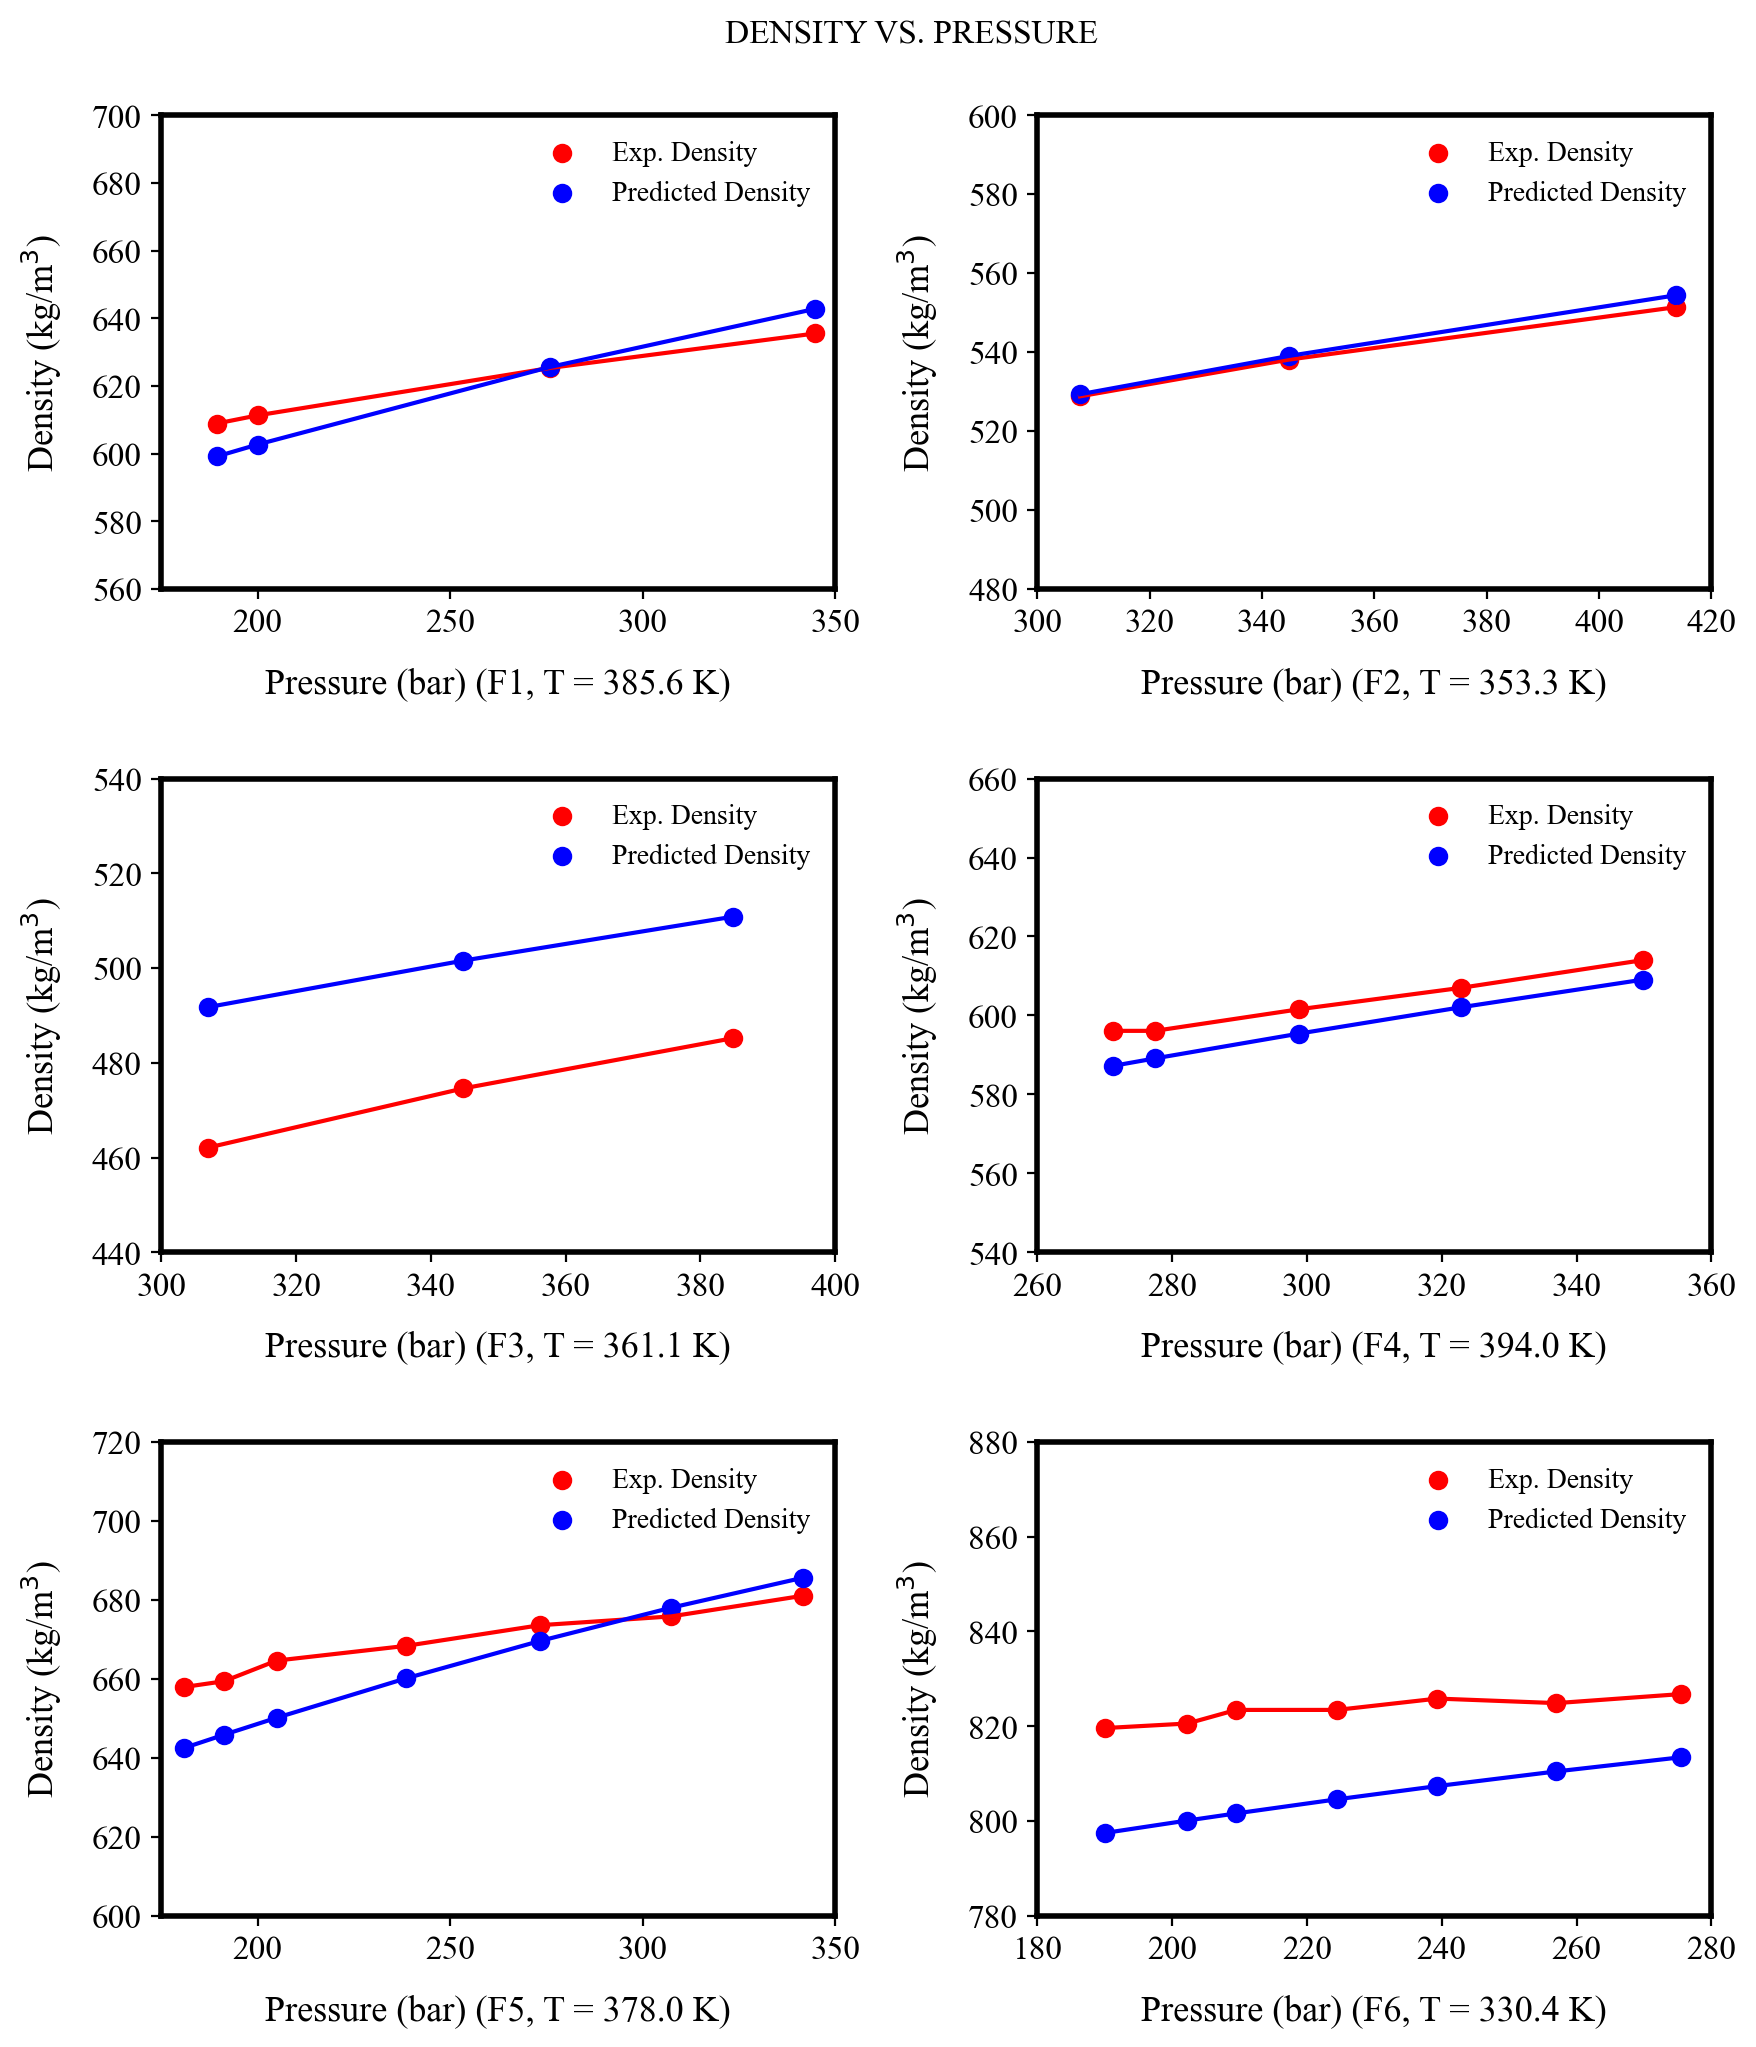

In [95]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig1 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(svr_test_result[svr_test_result["Ref. Name"] == j]["P"],svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(175,350)


ax2.set_xlim(300,420)


ax3.set_xlim(300,400)


ax4.set_xlim(260,360)


ax5.set_xlim(175,350)


ax6.set_xlim(180,280)




##Set y limit for axis ##

ax1.set_ylim(560,700)


ax2.set_ylim(480,600)


ax3.set_ylim(440,540)


ax4.set_ylim(540,660)


ax5.set_ylim(600,720)


ax6.set_ylim(780,880)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 2. Visulization of Result with KNN

In [96]:
knn_test_result = test[["P","Density","Ref. Name"]]
knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]

<ipython-input-96-d6e9f48c9340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_test_result["Density Predicted"] = result_knn_test["Predicted Density (test)"]


In [97]:
Ref_name_list = knn_test_result["Ref. Name"].unique()

<ipython-input-98-e8217a327764>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-98-e8217a327764>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


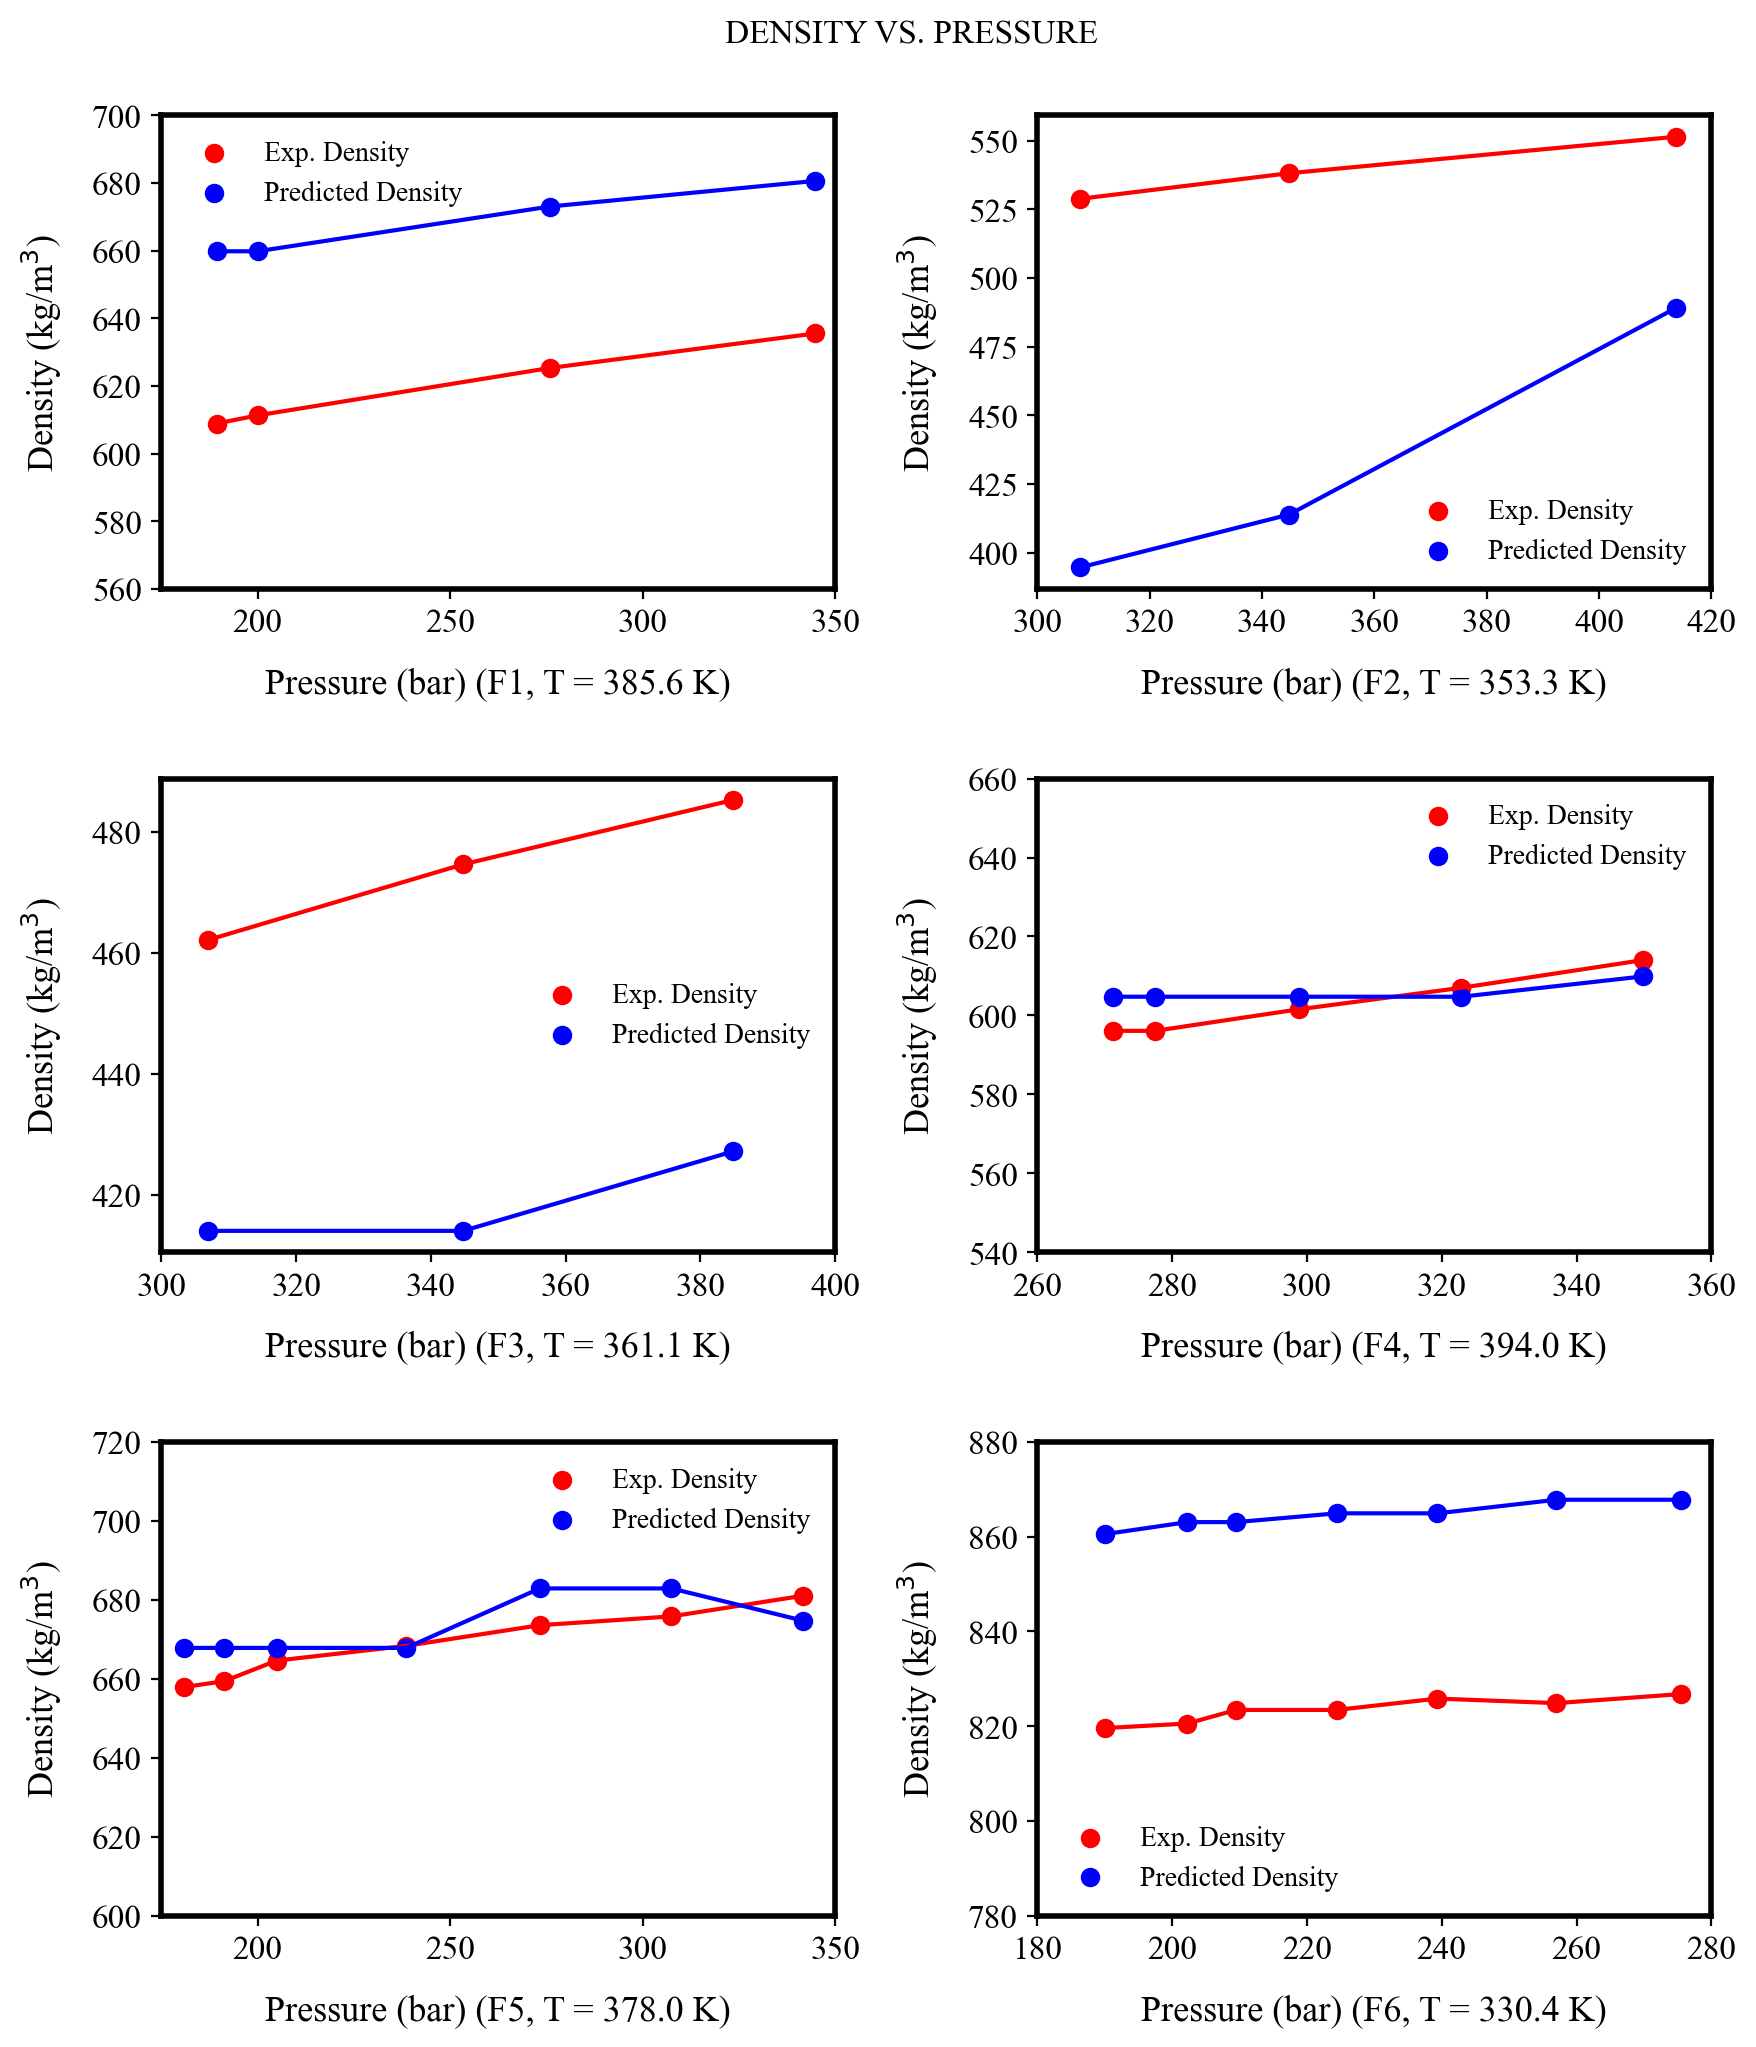

In [98]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig2 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(knn_test_result[knn_test_result["Ref. Name"] == j]["P"],knn_test_result[knn_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(175,350)


ax2.set_xlim(300,420)


ax3.set_xlim(300,400)


ax4.set_xlim(260,360)


ax5.set_xlim(175,350)


ax6.set_xlim(180,280)




##Set y limit for axis ##

ax1.set_ylim(560,700)


#ax2.set_ylim(480,600)


#ax3.set_ylim(440,540)


ax4.set_ylim(540,660)


ax5.set_ylim(600,720)


ax6.set_ylim(780,880)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig2.savefig(figure_path + "knnJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 3. Visulization of Result with XGB

In [99]:
xgb_test_result = test[["P","Density","Ref. Name"]]
xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]

<ipython-input-99-1cb52a3d63f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test_result["Density Predicted"] = result_xgb_test["Predicted Density (test)"]


In [100]:
Ref_name_list = xgb_test_result["Ref. Name"].unique()

<ipython-input-101-f7cba2fc98ff>:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-101-f7cba2fc98ff>:74: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


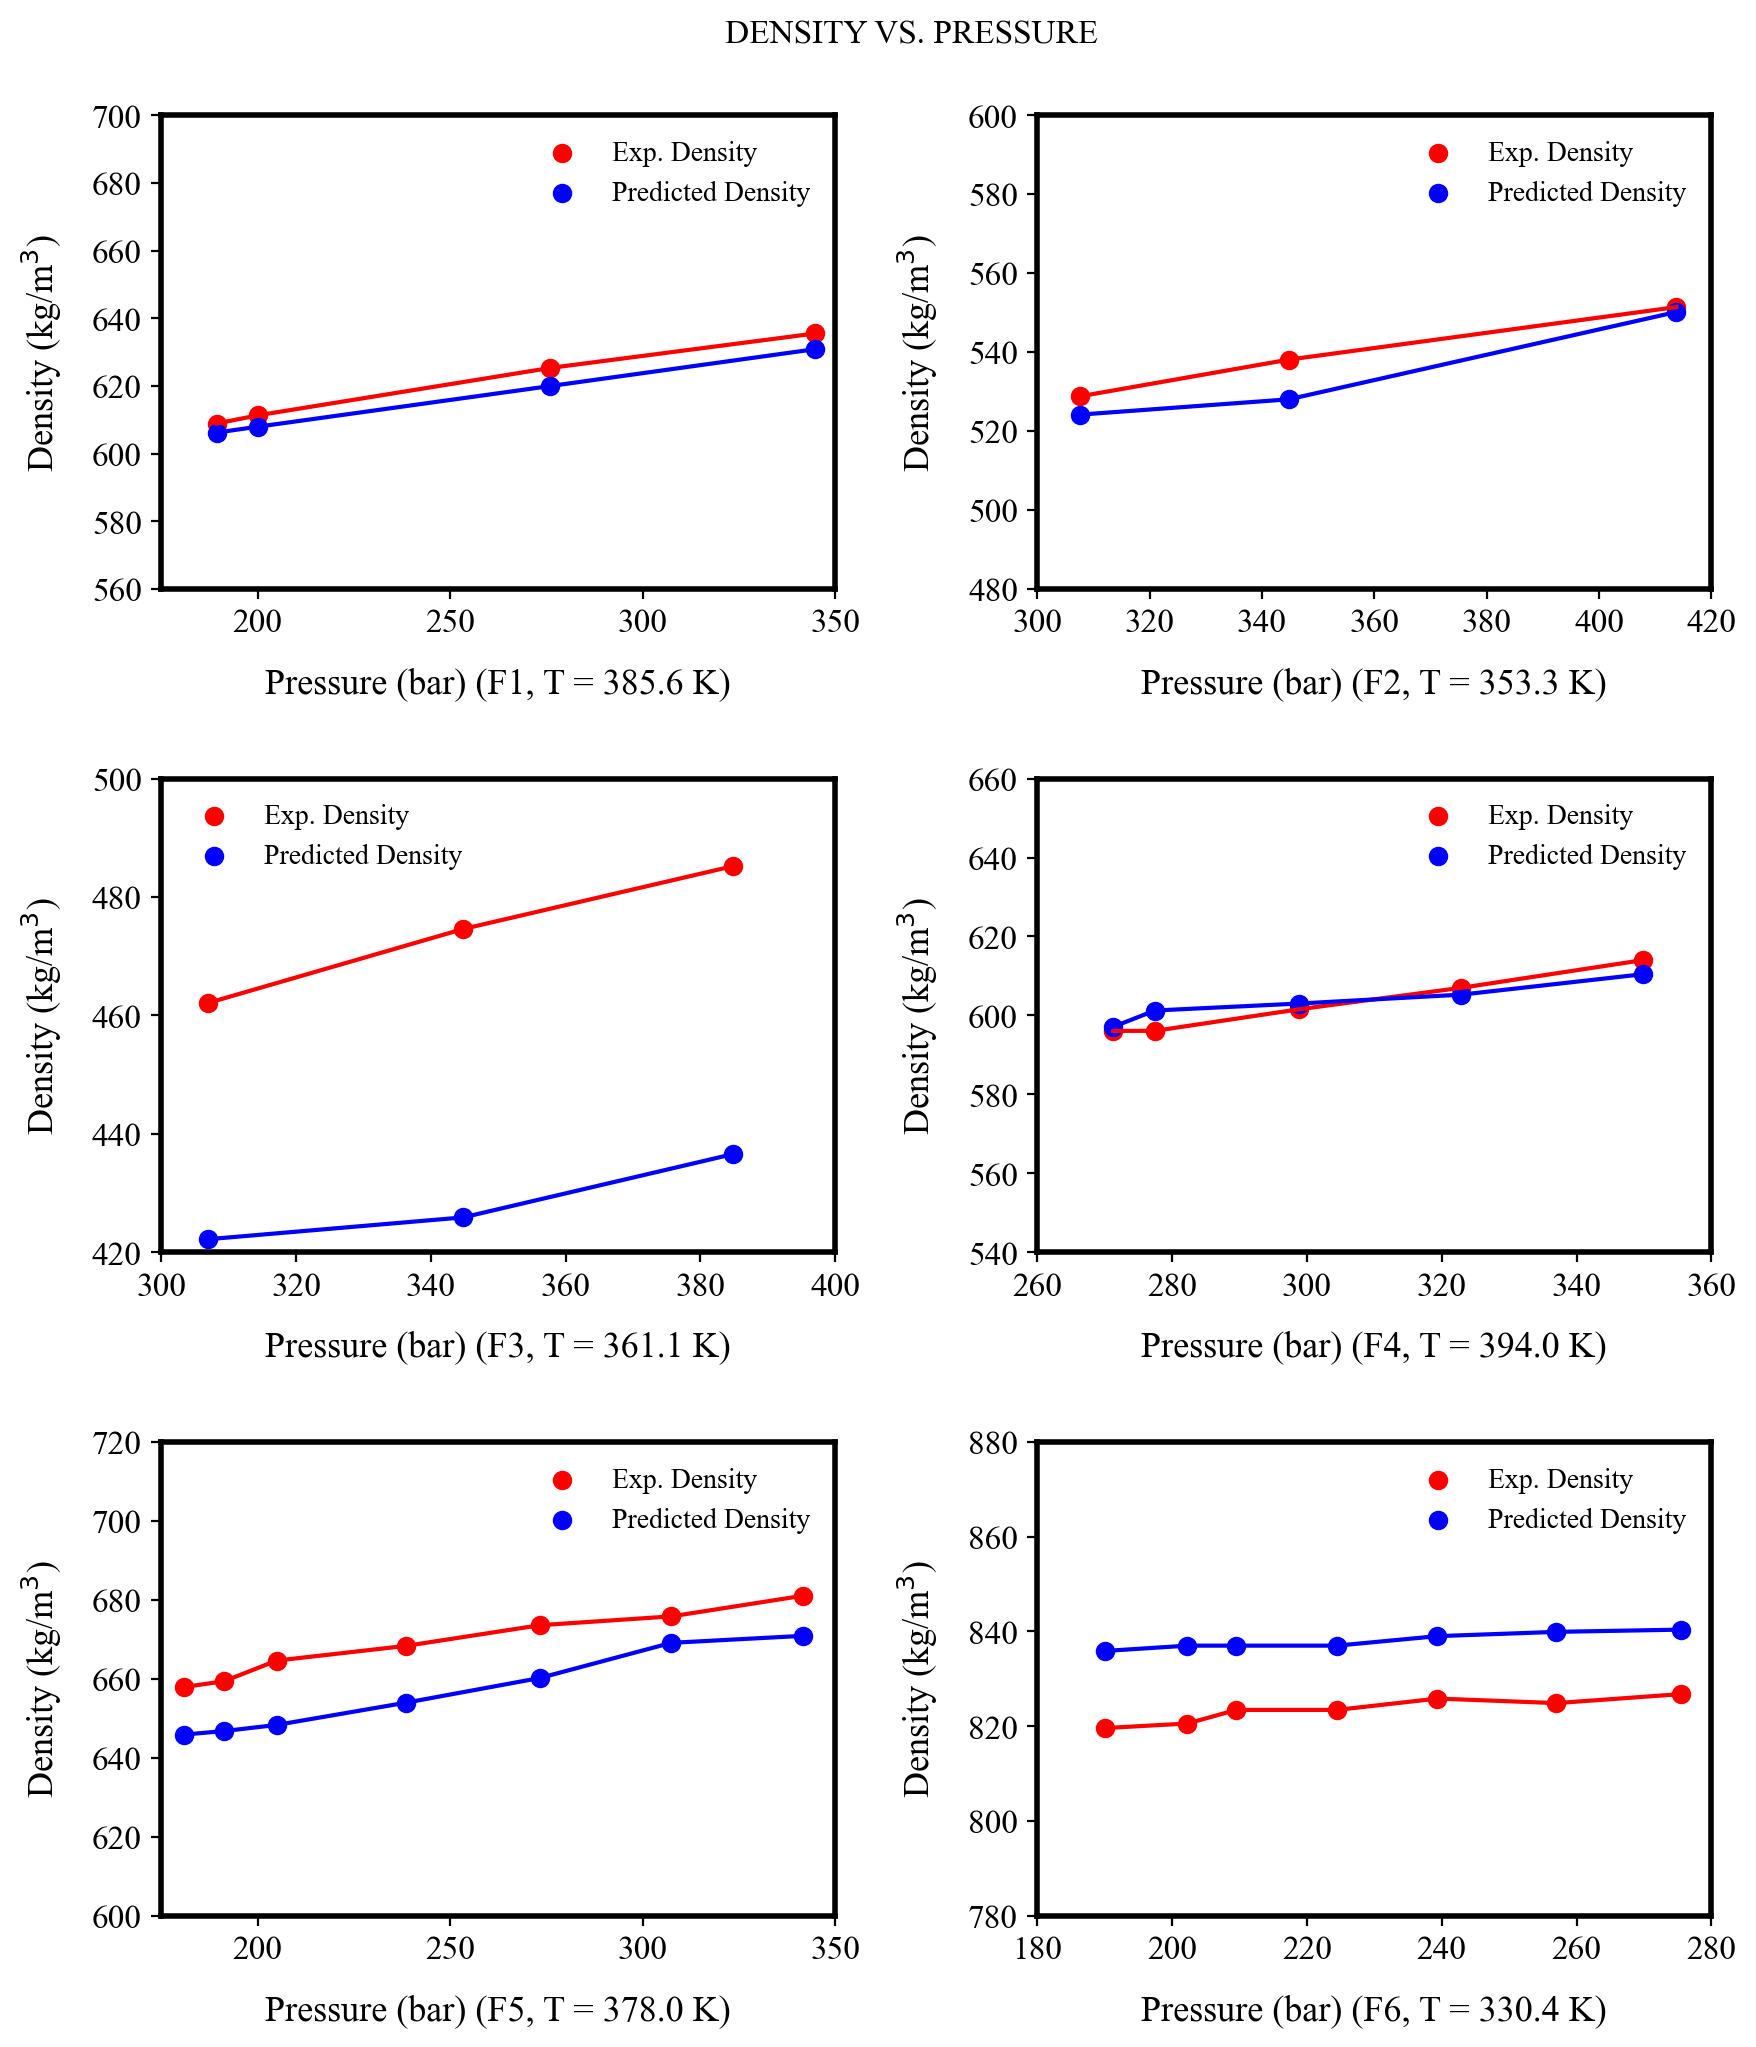

In [101]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig3 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("DENSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red",label = "Exp. Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density"],c = "red")
    plt.scatter(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue",label = "Predicted Density")
    plt.plot(xgb_test_result[xgb_test_result["Ref. Name"] == j]["P"],xgb_test_result[xgb_test_result["Ref. Name"] == j]["Density Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Ref. Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Density (kg/m$^{3}$)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,7,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(175,350)


ax2.set_xlim(300,420)


ax3.set_xlim(300,400)


ax4.set_xlim(260,360)


ax5.set_xlim(175,350)


ax6.set_xlim(180,280)




##Set y limit for axis ##

ax1.set_ylim(560,700)


ax2.set_ylim(480,600)


ax3.set_ylim(420,500)


ax4.set_ylim(540,660)


ax5.set_ylim(600,720)


ax6.set_ylim(780,880)



        
plt.subplots_adjust(wspace=0.3,hspace = 0.4)  

fig3.savefig(figure_path + "xgbjubart.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
